## Importing the initial libraries for importing data, Data Cleaning, Data Pre-processing and Data Visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
train = pd.read_csv('/content/Training.csv')
test = pd.read_csv('/content/Test.csv')

In [ ]:
train.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00,2013-03-01


In [ ]:
test.head()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,2013,3,1,18,11.0,8.0,20.0,500.0,70.0,3.1,1027.4,-18.4,0.0,NNE,2.1,01/03/13 18:00,01/03/13
1,2013,3,2,13,25.0,20.0,57.0,700.0,39.0,3.3,1025.7,-16.4,0.0,W,1.5,02/03/13 13:00,02/03/13
2,2013,3,3,13,98.0,50.0,81.0,1200.0,33.0,16.0,1011.5,-13.5,0.0,W,5.9,03/03/13 13:00,03/03/13
3,2013,3,4,4,7.0,14.0,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,04/03/13 4:00,04/03/13
4,2013,3,5,9,114.0,114.0,92.0,2899.0,84.0,7.7,1012.8,-8.4,0.0,NNE,1.5,05/03/13 9:00,05/03/13


In [29]:
test.shape

(1303, 17)

# Data Pre-processing

In [ ]:
# Knowing about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33043 entries, 0 to 33042
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        33043 non-null  int64  
 1   year      33043 non-null  int64  
 2   month     33043 non-null  int64  
 3   day       33043 non-null  int64  
 4   hour      33043 non-null  int64  
 5   PM2.5     32833 non-null  float64
 6   PM10      33043 non-null  float64
 7   SO2       32767 non-null  float64
 8   NO2       32692 non-null  float64
 9   CO        31965 non-null  float64
 10  O3        32005 non-null  float64
 11  TEMP      33023 non-null  float64
 12  PRES      33023 non-null  float64
 13  DEWP      33023 non-null  float64
 14  RAIN      33023 non-null  float64
 15  wd        32964 non-null  object 
 16  WSPM      33029 non-null  float64
 17  DateTime  33043 non-null  object 
 18  Date      33043 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 4.8+ MB


In [ ]:
print(f'No. of rows : {train.shape[0]}')
print(f'No. of columns : {train.shape[1]}')

No. of rows : 33043
No. of columns : 19


In [ ]:
train.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,33043.000000,33043.000000,33043.000000,33043.000000,33043.000000,32833.000000,33043.000000,32767.000000,32692.000000,31965.000000,32005.000000,33023.000000,33023.000000,33023.000000,33023.000000,33029.000000
mean,17536.469086,2014.667373,6.474170,15.621554,11.485186,82.655204,109.942384,17.359163,59.285158,1263.257657,56.289418,13.696249,1011.728390,3.265969,0.067756,1.705053
std,10179.915968,1.182478,3.424317,8.786949,6.931355,81.954312,95.178092,22.780848,37.094263,1221.817187,57.871702,11.370482,10.385319,13.663185,0.921651,1.200622
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8624.500000,2014.000000,4.000000,8.000000,5.000000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.200000,-7.900000,0.000000,0.900000
50%,17695.000000,2015.000000,6.000000,16.000000,11.000000,58.000000,86.000000,9.000000,53.172700,900.000000,42.000000,14.700000,1011.200000,4.000000,0.000000,1.400000
75%,26372.500000,2016.000000,9.000000,23.000000,17.000000,114.000000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.000000,15.700000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,713.000000,984.000000,229.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,27.800000,72.500000,11.200000


In [ ]:
train.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5        210
PM10           0
SO2          276
NO2          351
CO          1078
O3          1038
TEMP          20
PRES          20
DEWP          20
RAIN          20
wd            79
WSPM          14
DateTime       0
Date           0
dtype: int64

In [ ]:
test.isnull().sum()

year         0
month        0
day          0
hour         0
PM2.5        6
SO2         10
NO2         19
CO          47
O3          41
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           2
WSPM         0
DateTime     0
Date         0
dtype: int64

Certain variables in the dataset contains null values.<br>
It needs to be handled and imputed with certain values.

# Data Visualization for Null Values

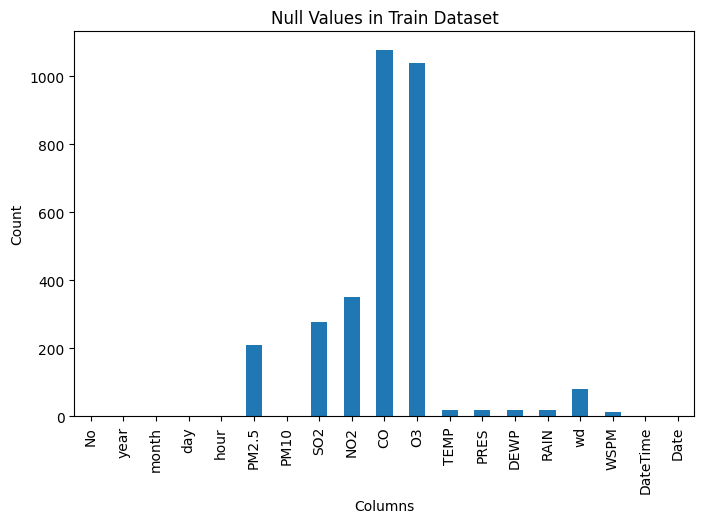

In [ ]:
plt.figure(figsize=(8,5))
train.isnull().sum().plot(kind='bar')
plt.title("Null Values in Train Dataset")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.show()

<h2> PM2.5 </h2>

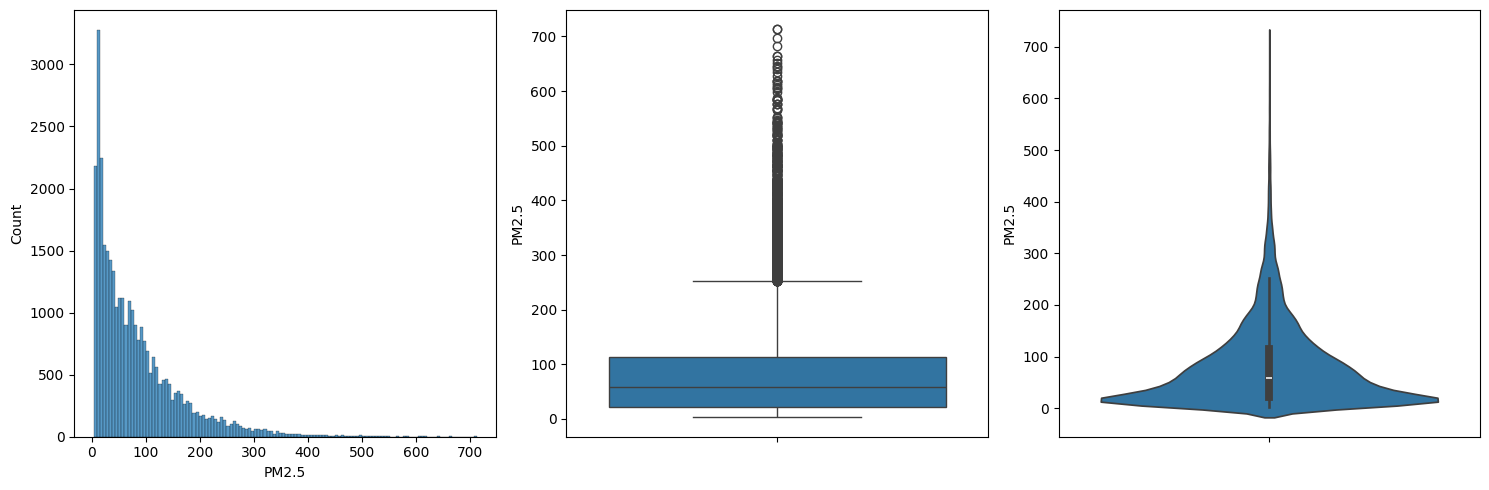

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['PM2.5'], ax=ax[0])
sns.boxplot(train['PM2.5'], ax=ax[1])
sns.violinplot(train['PM2.5'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> SO2 </h2>

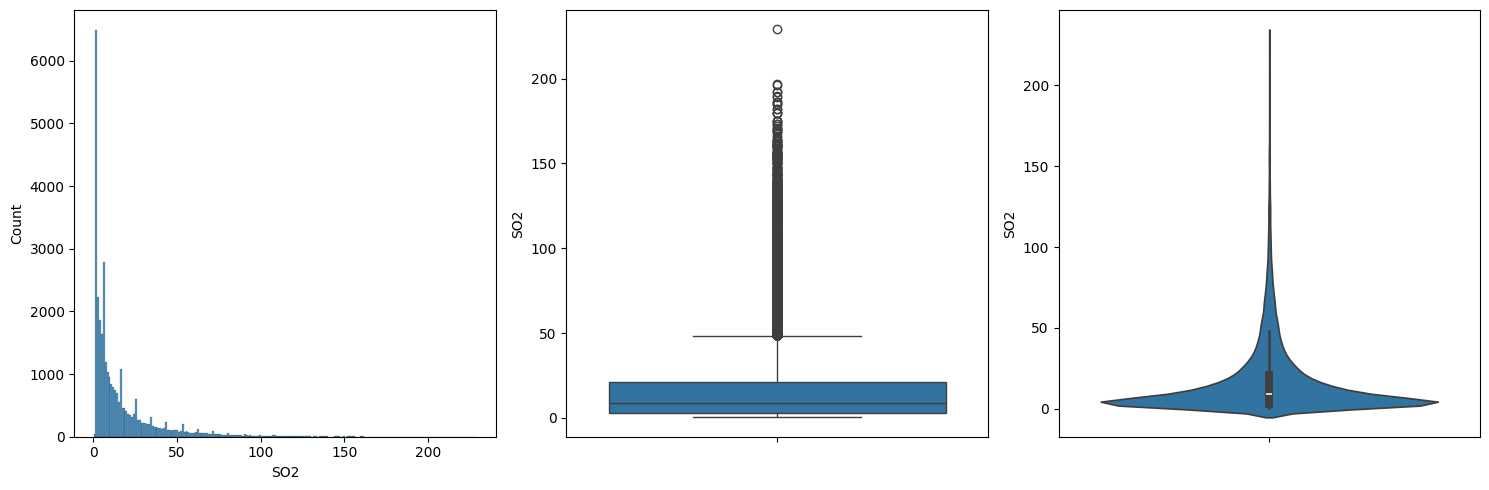

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['SO2'], ax=ax[0])
sns.boxplot(train['SO2'], ax=ax[1])
sns.violinplot(train['SO2'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> NO2 </h2>

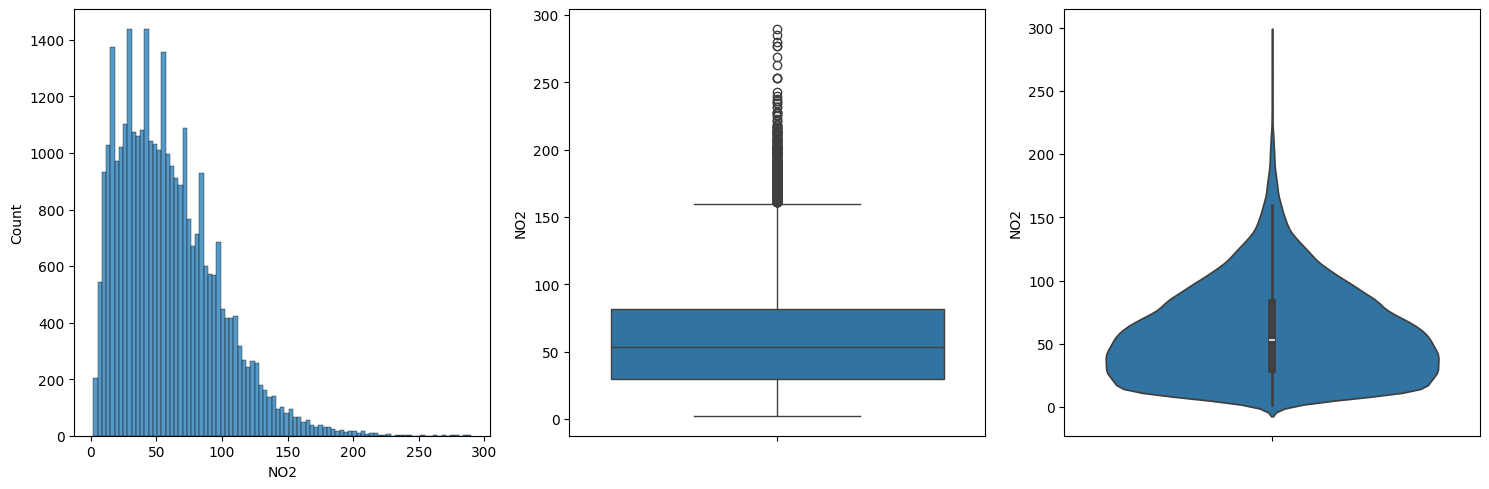

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['NO2'], ax=ax[0])
sns.boxplot(train['NO2'], ax=ax[1])
sns.violinplot(train['NO2'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> CO </h2>

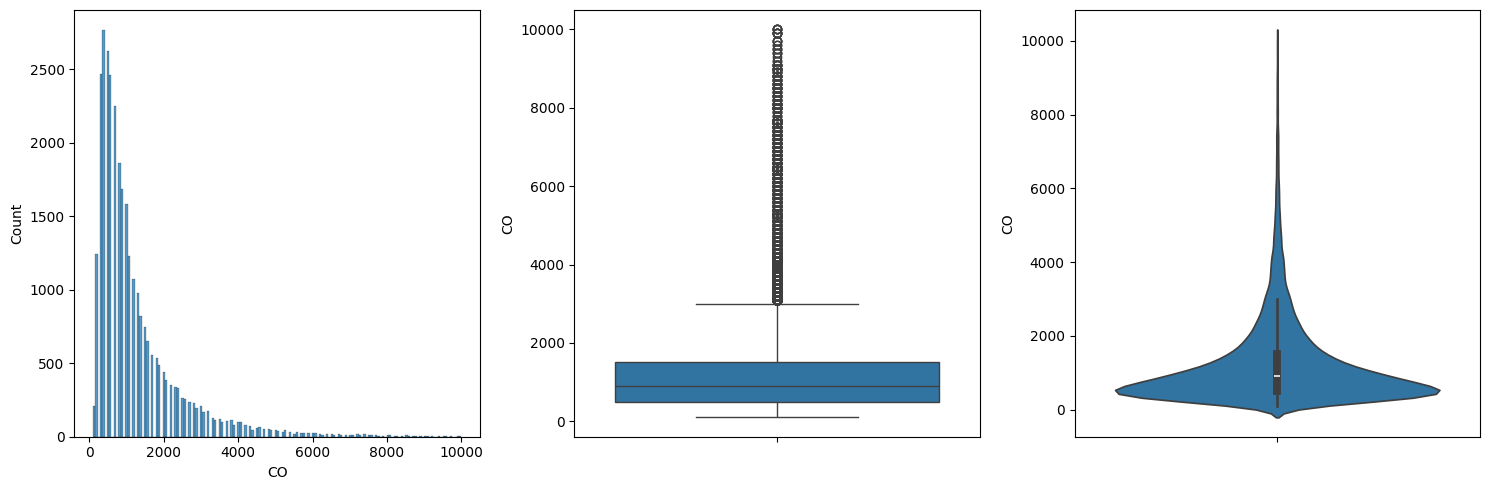

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['CO'], ax=ax[0])
sns.boxplot(train['CO'], ax=ax[1])
sns.violinplot(train['CO'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> O3 </h2>

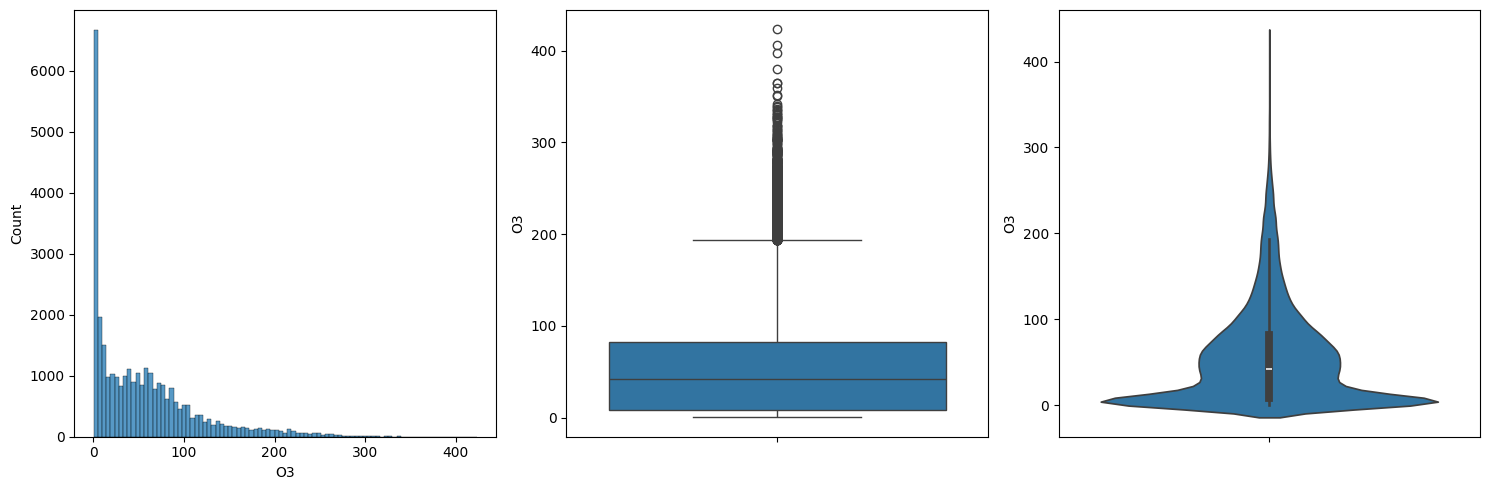

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['O3'], ax=ax[0])
sns.boxplot(train['O3'], ax=ax[1])
sns.violinplot(train['O3'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> TEMP </h2>

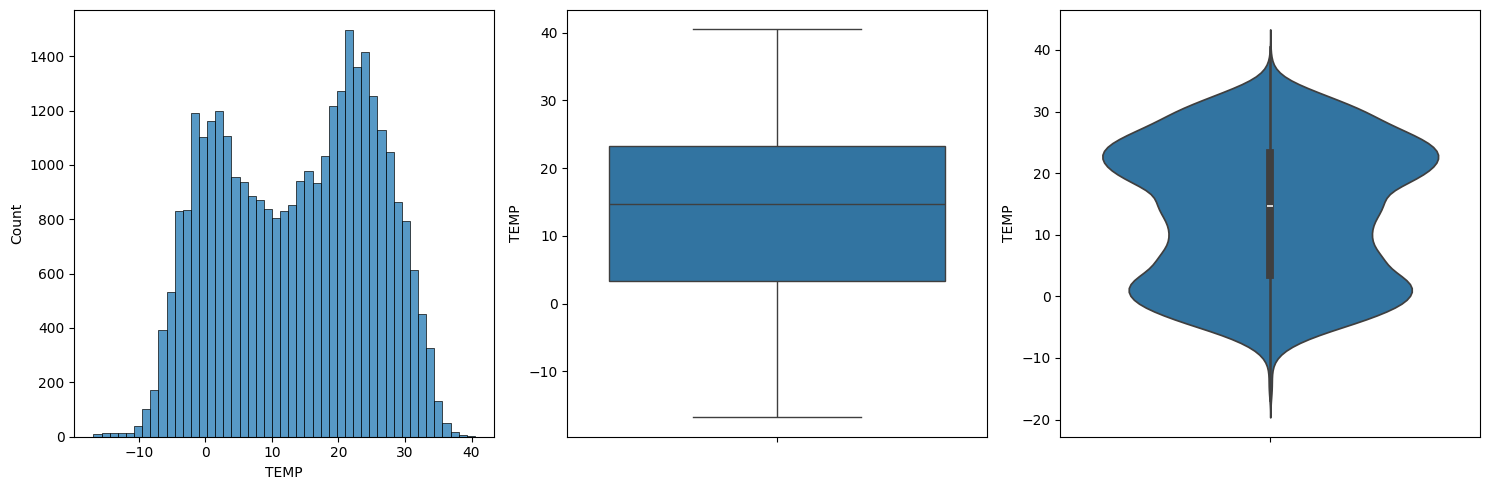

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['TEMP'], ax=ax[0])
sns.boxplot(train['TEMP'], ax=ax[1])
sns.violinplot(train['TEMP'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> PRES </h2>

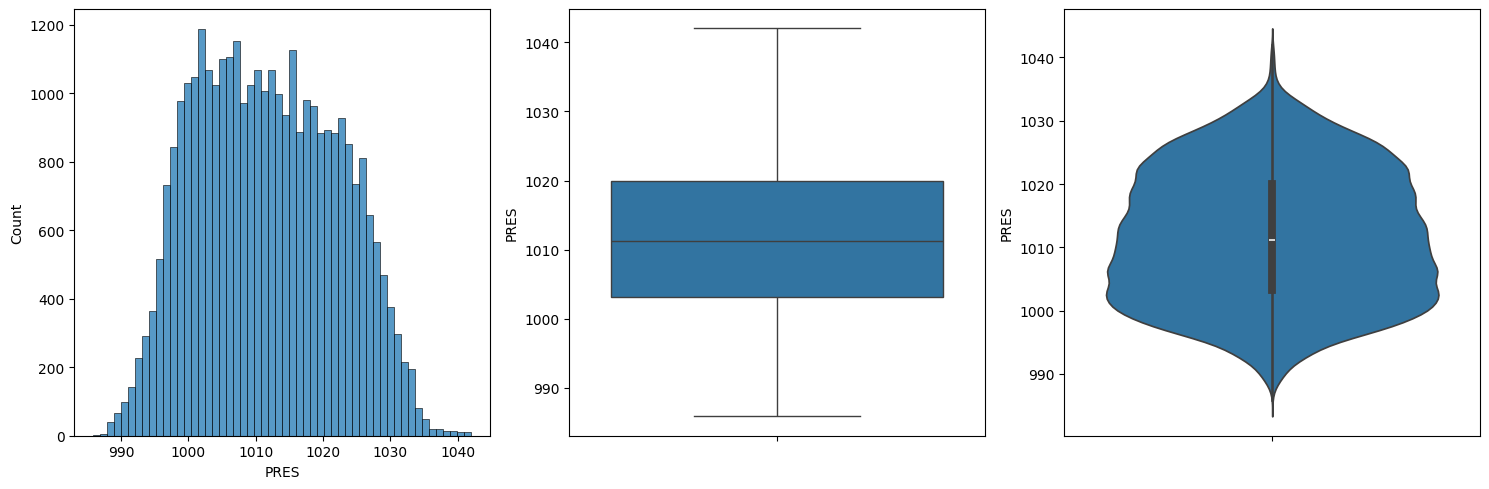

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['PRES'], ax=ax[0])
sns.boxplot(train['PRES'], ax=ax[1])
sns.violinplot(train['PRES'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> DEWP </h2>

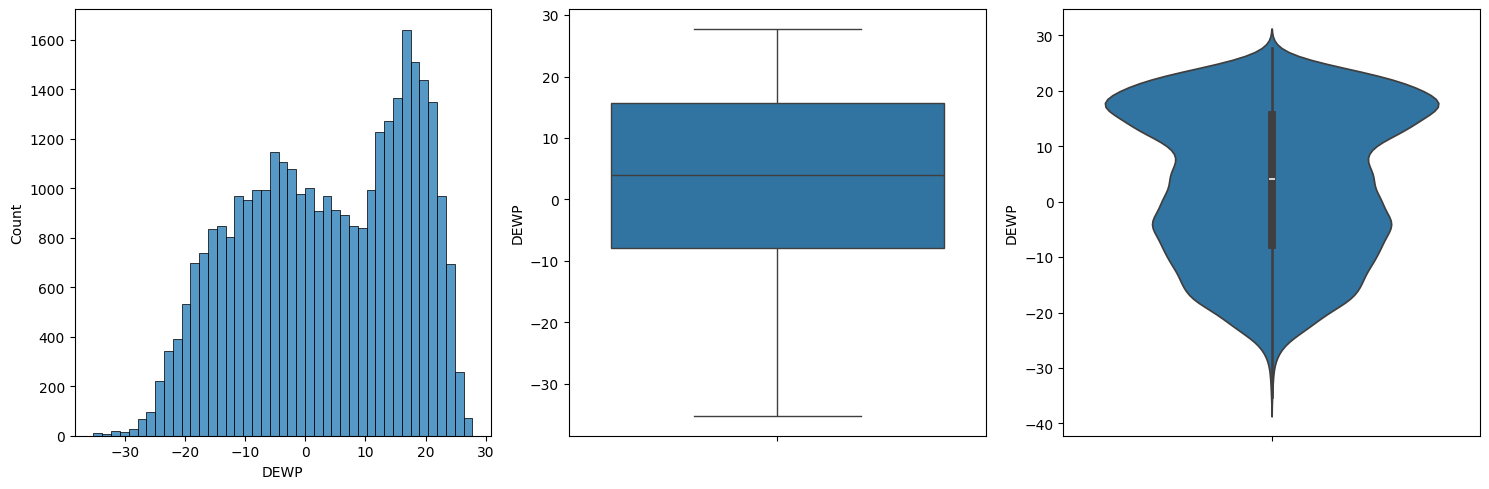

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['DEWP'], ax=ax[0])
sns.boxplot(train['DEWP'], ax=ax[1])
sns.violinplot(train['DEWP'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> RAIN </h2>

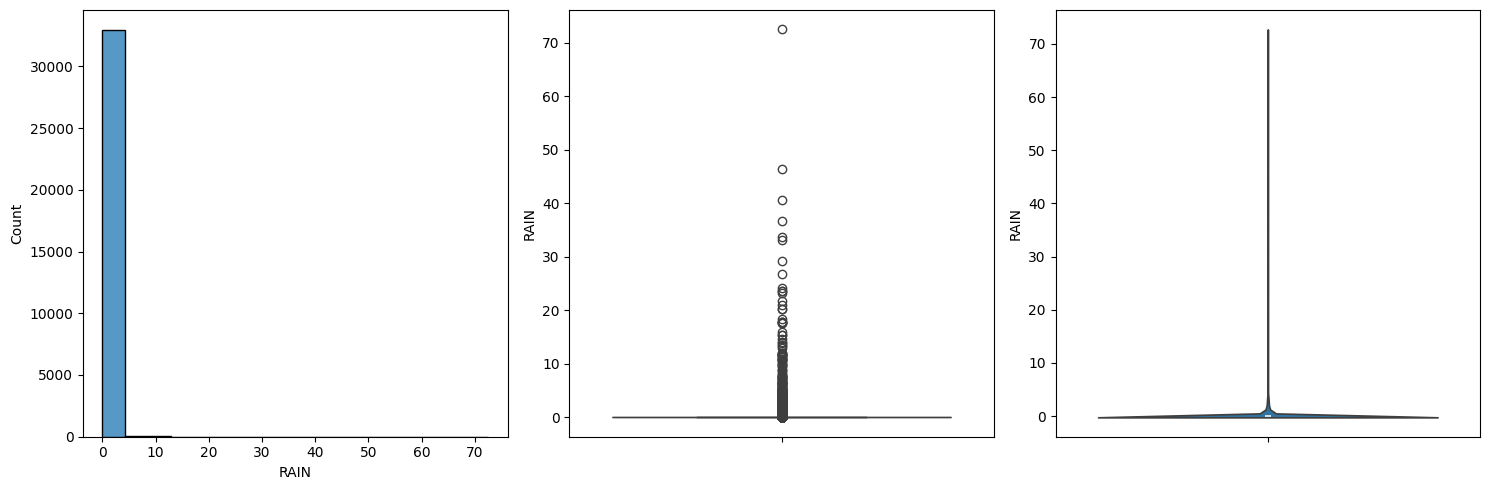

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['RAIN'], ax=ax[0])
sns.boxplot(train['RAIN'], ax=ax[1])
sns.violinplot(train['RAIN'], ax=ax[2])

plt.tight_layout()
plt.show()

<h2> WD </h2>

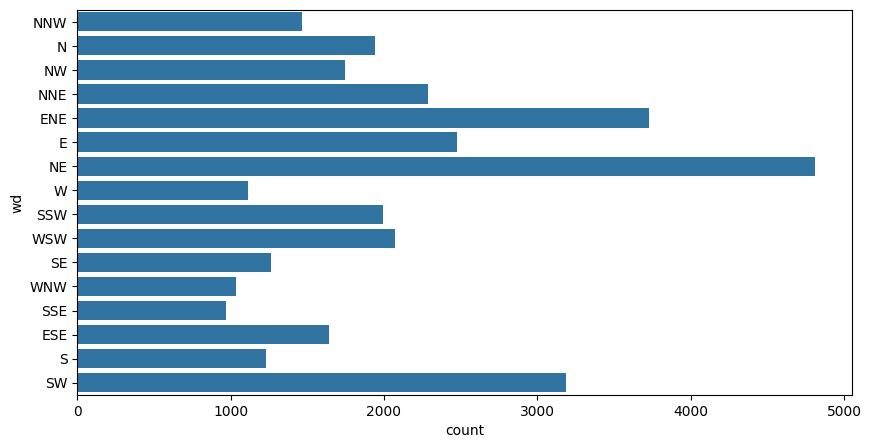

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(train['wd'])
plt.show()

<h2> WSPM </h2>

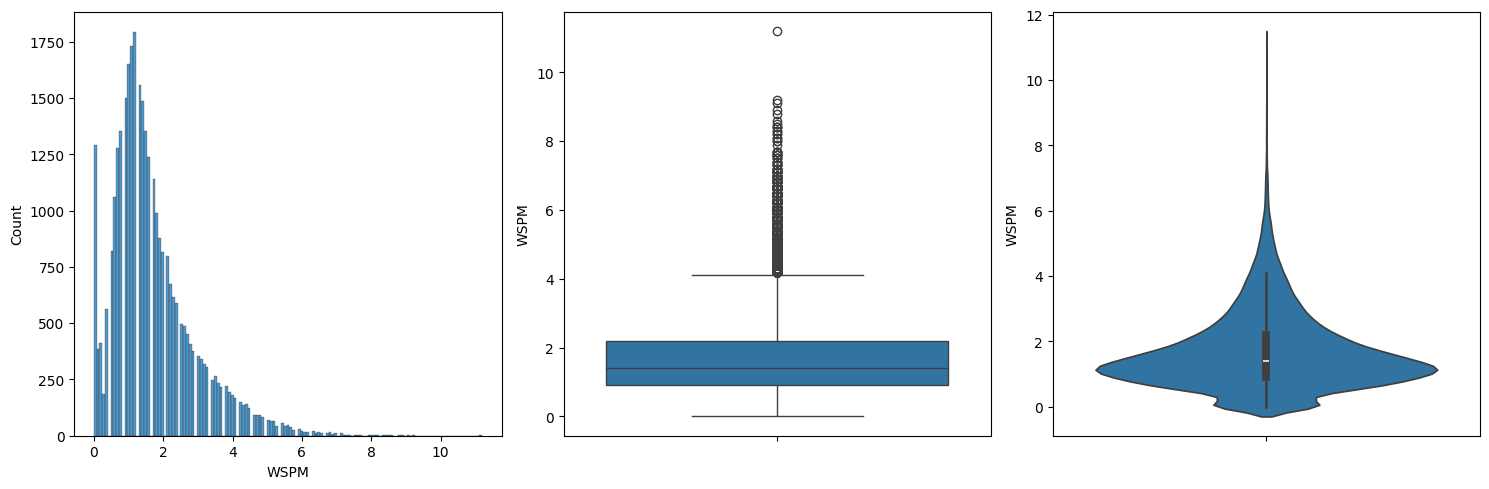

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train['WSPM'], ax=ax[0])
sns.boxplot(train['WSPM'], ax=ax[1])
sns.violinplot(train['WSPM'], ax=ax[2])

plt.tight_layout()
plt.show()

<h3> Important take away from these visualizations.</h3>

* Most of the variables are right skewed, contains outliers in the data.
* Impouting the missing values with the median, or the mode for the categorical variables.
* Handling the outliers effectively.


# Handling the Missing Values in a dataset

In [30]:
#imputing missing values

train['PM2.5'] = np.where(train['PM2.5'].isna() == True, train['PM2.5'].median(), train['PM2.5'])
train['SO2'] = np.where(train['SO2'].isna() == True, train['SO2'].median(), train['SO2'])
train['NO2'] = np.where(train['NO2'].isna() == True, train['NO2'].median(), train['NO2'])
train['CO'] = np.where(train['CO'].isna() == True, train['CO'].median(), train['CO'])
train['O3'] = np.where(train['O3'].isna() == True, train['O3'].median(), train['O3'])
train['TEMP'] = np.where(train['TEMP'].isna() == True, train['TEMP'].median(), train['TEMP'])
train['PRES'] = np.where(train['PRES'].isna() == True, train['PRES'].median(), train['PRES'])
train['DEWP'] = np.where(train['DEWP'].isna() == True, train['DEWP'].median(), train['DEWP'])
train['RAIN'] = np.where(train['RAIN'].isna() == True, train['RAIN'].median(), train['RAIN'])
train['wd'] = np.where(train['wd'].isna(), 'NE', train['wd'])
train['WSPM'] = np.where(train['WSPM'].isna(), train['WSPM'].median(), train['WSPM'])

In [31]:
test['PM2.5'] = np.where(test['PM2.5'].isna()== True, test['PM2.5'].median(), test['PM2.5'])
test['SO2'] = np.where(test['SO2'].isna()== True, test['SO2'].median(), test['SO2'])
test['NO2'] = np.where(test['NO2'].isna()== True, test['NO2'].median(), test['NO2'])
test['CO'] = np.where(test['CO'].isna()== True, test['CO'].median(), test['CO'])
test['O3'] = np.where(test['O3'].isna()== True, test['O3'].median(), test['O3'])
test['wd'] = np.where(test['wd'].isna() == True, 'NE',test['wd'])

# Viewing the dataset

In [ ]:
train.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00,2013-03-01


* The variables <b> No, DateTime, Date </b> do not contribute much to the dataset, hence can be removed.
* Also examinig the categorical features of the data.
* year, month, day, hour and wd are the categorical features.
* year, month, day, hour contains many categories, creating the dummy variables for each category will lead to high model complexity.
* Therefore these variables will be handled by creating bins.

In [32]:
num_cols = ['PM2.5', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM10']
cat_cols = ['year', 'month', 'day', 'hour', 'wd']

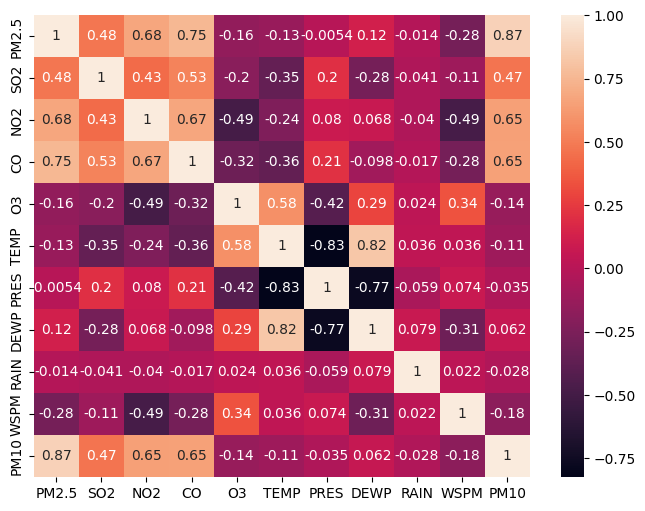

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(train[num_cols].corr(), annot=True)
plt.show()

* PM10 - PM2.5 shows high positive collinearity = .87
* TEMP - PRES high negative collinearity = -.83
* TEMP - DEWP high positive collinearity = .82
* PRES - DEWP high negative collinearity = -.77

In [ ]:
train.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00,2013-03-01


<h2> Binning for Hour Variable

In [33]:
# Define bins and labels
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column with binned values
train['hour_bin'] = pd.cut(train['hour'], bins=bins, labels=labels, right=False)

# One-hot encode the binned column
hour_bin_encoded = pd.get_dummies(train['hour_bin'], prefix='hour')
train = pd.concat([train, hour_bin_encoded], axis=1)

# Drop the original 'hour' and 'hour_bin' columns if needed
train.drop(['hour', 'hour_bin'], axis=1, inplace=True)

In [34]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column with binned values
test['hour_bin'] = pd.cut(test['hour'], bins=bins, labels=labels, right=False)

# One-hot encode the binned column
hour_bin_encoded = pd.get_dummies(test['hour_bin'], prefix='hour')
test = pd.concat([test, hour_bin_encoded], axis=1)

# Drop the original 'hour' and 'hour_bin' columns if needed
test.drop(['hour', 'hour_bin'], axis=1, inplace=True)


<h2> Binning for Day Variable

In [35]:
# Define bins and labels
bins = [0, 10, 20, 31]
labels = ['early', 'mid', 'late']

# Create a new column with binned values
train['day_bin'] = pd.cut(train['day'], bins=bins, labels=labels, right=False)

# One-hot encode the binned column
day_bin_encoded = pd.get_dummies(train['day_bin'], prefix='day')
train = pd.concat([train, day_bin_encoded], axis=1)

# Drop the original 'day' and 'day_bin' columns if needed
train.drop(['day', 'day_bin'], axis=1, inplace=True)


In [36]:
# Define bins and labels
bins = [0, 10, 20, 31]
labels = ['early', 'mid', 'late']

# Create a new column with binned values
test['day_bin'] = pd.cut(test['day'], bins=bins, labels=labels, right=False)

# One-hot encode the binned column
day_bin_encoded = pd.get_dummies(test['day_bin'], prefix='day')
test = pd.concat([test, day_bin_encoded], axis=1)

# Drop the original 'day' and 'day_bin' columns if needed
test.drop(['day', 'day_bin'], axis=1, inplace=True)


<h2> Binning for Month Variable

In [37]:
# Define bins and labels for seasons
bins = [0, 3, 6, 9, 12]
labels = ['Winter', 'Spring', 'Summer', 'Fall']

# Create a new column with binned values
train['season'] = pd.cut(train['month'] % 12, bins=bins, labels=labels, right=False)

# One-hot encode the season column
season_encoded = pd.get_dummies(train['season'], prefix='season')
train = pd.concat([train, season_encoded], axis=1)

# Drop the original 'month' and 'season' columns if needed
train.drop(['month', 'season'], axis=1, inplace=True)


In [38]:
# Define bins and labels for seasons
bins = [0, 3, 6, 9, 12]
labels = ['Winter', 'Spring', 'Summer', 'Fall']

# Create a new column with binned values
test['season'] = pd.cut(test['month'] % 12, bins=bins, labels=labels, right=False)

# One-hot encode the season column
season_encoded = pd.get_dummies(test['season'], prefix='season')
test = pd.concat([test, season_encoded], axis=1)

# Drop the original 'month' and 'season' columns if needed
test.drop(['month', 'season'], axis=1, inplace=True)


In [39]:
bool_cols = train.select_dtypes(include=['bool']).columns
train[bool_cols] = train[bool_cols].astype(int)
bool_cols_test = test.select_dtypes(include=['bool']).columns
test[bool_cols_test] = test[bool_cols].astype(int)

<h2> Creating dummies variable for year and wd columns

In [40]:
train = pd.get_dummies(train, columns=['year', 'wd'], dtype='int')
test = pd.get_dummies(test, columns=['year', 'wd'], dtype='int')

In [41]:
train.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,...,1,0,0,0,0,0,0,0,0,0
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,...,0,0,0,0,0,0,0,0,0,0
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,...,1,0,0,0,0,0,0,0,0,0
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,...,0,1,0,0,0,0,0,0,0,0
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train.shape

(33043, 46)

In [43]:
test.head()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,11.0,8.0,20.0,500.0,70.0,3.1,1027.4,-18.4,0.0,2.1,...,0,0,0,0,0,0,0,0,0,0
1,25.0,20.0,57.0,700.0,39.0,3.3,1025.7,-16.4,0.0,1.5,...,0,0,0,0,0,0,0,1,0,0
2,98.0,50.0,81.0,1200.0,33.0,16.0,1011.5,-13.5,0.0,5.9,...,0,0,0,0,0,0,0,1,0,0
3,7.0,14.0,54.5,400.0,42.0,6.0,1018.0,-11.6,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,114.0,114.0,92.0,2899.0,84.0,7.7,1012.8,-8.4,0.0,1.5,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test.shape

(1303, 44)

# Cleaned Dataset

In [ ]:
train.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,...,1,0,0,0,0,0,0,0,0,0
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,...,0,0,0,0,0,0,0,0,0,0
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,...,1,0,0,0,0,0,0,0,0,0
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,...,0,1,0,0,0,0,0,0,0,0
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train = train.drop(['No', 'DateTime', 'Date'], axis=1)
train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,...,1,0,0,0,0,0,0,0,0,0
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,...,1,0,0,0,0,0,0,0,0,0
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,...,0,1,0,0,0,0,0,0,0,0
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

## Importing libraries for building a model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [47]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('PM10', axis=1), train['PM10'], test_size=0.33, random_state=42)

## Building Models and compairing the results

In [49]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Dictionaries to store RMSE scores
train_rmse_scores = {}
val_rmse_scores = {}

# Train each model and calculate RMSE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    train_rmse_scores[name] = train_rmse
    val_rmse_scores[name] = val_rmse


# Display RMSE scores
print("Training RMSE scores:", train_rmse_scores)
print("Validation RMSE scores:", val_rmse_scores)


Training RMSE scores: {'Linear Regression': 40.32701313232049, 'Decision Tree': 0.0, 'Random Forest': 12.17833438647915, 'Gradient Boosting': 34.62282072919455, 'XGBoost': 19.445520596411317}
Validation RMSE scores: {'Linear Regression': 43.25220139903204, 'Decision Tree': 51.043580565227245, 'Random Forest': 36.884122583279336, 'Gradient Boosting': 39.54817105051025, 'XGBoost': 36.05829798341176}


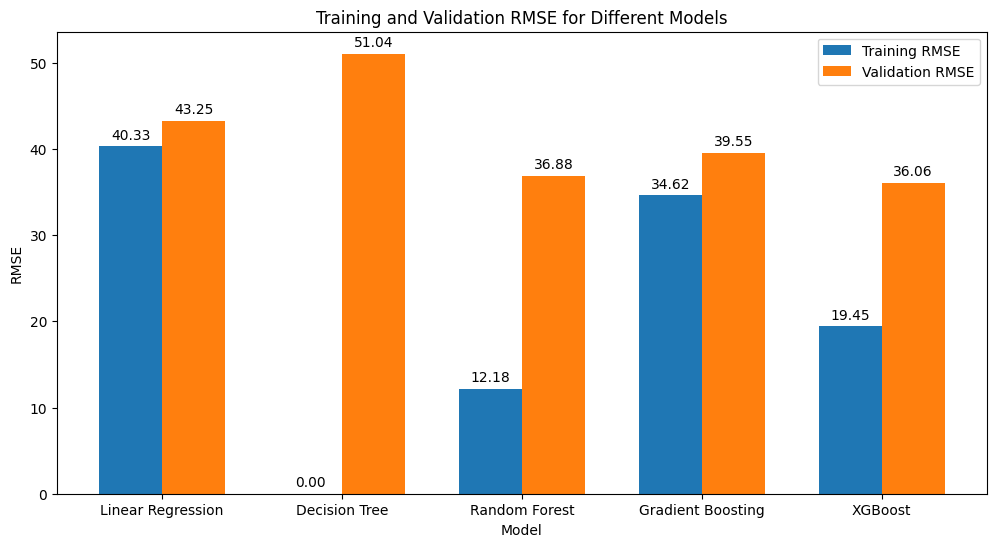

In [50]:
# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training RMSE': list(train_rmse_scores.values()),
    'Validation RMSE': list(val_rmse_scores.values())
})

# Plot the RMSE scores
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(models))

# Plot Training RMSE
bars1 = plt.bar(index, results_df['Training RMSE'], bar_width, label='Training RMSE')

# Plot Validation RMSE
bars2 = plt.bar(index + bar_width, results_df['Validation RMSE'], bar_width, label='Validation RMSE')

# Add text annotations to bars
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE for Different Models')
plt.xticks(index + bar_width / 2, results_df['Model'])
plt.legend()
plt.show()

## Creating submission file for each models

In [54]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Dictionary to store predictions
predictions = {}

# Train each model and generate predictions
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(test.sort_values(by=['DateTime'], ascending=True).drop(['Date','DateTime'], axis = 1))
    predictions[name] = y_pred
    print(f"{name} trained and predictions generated.")

# Save predictions to CSV files
for name, y_pred in predictions.items():
    submission_df = pd.DataFrame({
        'Id': np.arange(len(y_pred)),
        'Prediction': y_pred
    })
    filename = f'{name.replace(" ", "_")}_predictions.csv'
    submission_df.to_csv(filename, index=False)
    print(f'Saved {filename}')

Training Linear Regression...
Linear Regression trained and predictions generated.
Training Decision Tree...
Decision Tree trained and predictions generated.
Training Random Forest...
Random Forest trained and predictions generated.
Training Gradient Boosting...
Gradient Boosting trained and predictions generated.
Training XGBoost...
XGBoost trained and predictions generated.
Saved Linear_Regression_predictions.csv
Saved Decision_Tree_predictions.csv
Saved Random_Forest_predictions.csv
Saved Gradient_Boosting_predictions.csv
Saved XGBoost_predictions.csv
